### Importing Libraries

In [94]:
import re
import pandas as pd

### Accessing WhatsApp Chat

In [95]:
f = open('WhatsApp Chat with Devansh Lodhi Medicaps.txt', 'r', encoding='utf-8')

### Reading WhatsApp Chat

In [96]:
data = f.read()
print(data)

29/10/21, 10:46 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
06/11/21, 3:41 pm - Devansh Lodhi Medicaps: Ganga Nagar
https://maps.app.goo.gl/jwTaq5DA47PztFMe9
10/11/21, 3:10 pm - Devansh Lodhi Medicaps: en19cs301106@medicaps.ac.in
T6wPkx52XyRTsLu
27/06/22, 2:17 pm - Dhananjay Porwal: Bhai avi ke gift me kitna contri krna he batao
27/06/22, 2:19 pm - Devansh Lodhi Medicaps: 75
27/06/22, 2:19 pm - Dhananjay Porwal: Hav
29/06/22, 9:47 pm - Dhananjay Porwal: All the best bhai exam ke liye ✨
29/06/22, 10:15 pm - Devansh Lodhi Medicaps: 🥲
01/07/22, 2:07 pm - Dhananjay Porwal: Paper kesa gya bhai?
01/07/22, 2:07 pm - Dhananjay Porwal: Me pucha hi bhul gya🥲
01/07/22, 2:07 pm - Devansh Lodhi Medicaps: diya hi nhi
01/07/22, 2:07 pm - Dhananjay Porwal: Tumne bhi😂
01/07/22, 2:09 pm - Devansh Lodhi Medicaps: yess
01/07/22, 2:09 pm - Devansh Lodhi Medicaps: but kya pata mera selection ho jaye
01/07/22

In [97]:
print(type(data))

<class 'str'>


### Create RegEx Pattern

In [98]:
# https://regex101.com/r/qP1AQg/1
pattern = '\d{1,2}\/\d{1,2}\/\d{2,4},\s\d{1,2}:\d{1,2}\s(?:AM|PM|am|pm)\s-\s'

### Split Messages Using RegEx Pattern

In [99]:
messages = re.split(pattern, data)[1:]
print(messages)

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', 'Devansh Lodhi Medicaps: Ganga Nagar\nhttps://maps.app.goo.gl/jwTaq5DA47PztFMe9\n', 'Devansh Lodhi Medicaps: en19cs301106@medicaps.ac.in\nT6wPkx52XyRTsLu\n', 'Dhananjay Porwal: Bhai avi ke gift me kitna contri krna he batao\n', 'Devansh Lodhi Medicaps: 75\n', 'Dhananjay Porwal: Hav\n', 'Dhananjay Porwal: All the best bhai exam ke liye ✨\n', 'Devansh Lodhi Medicaps: 🥲\n', 'Dhananjay Porwal: Paper kesa gya bhai?\n', 'Dhananjay Porwal: Me pucha hi bhul gya🥲\n', 'Devansh Lodhi Medicaps: diya hi nhi\n', 'Dhananjay Porwal: Tumne bhi😂\n', 'Devansh Lodhi Medicaps: yess\n', 'Devansh Lodhi Medicaps: but kya pata mera selection ho jaye\n', 'Dhananjay Porwal: 🤣\n', 'Devansh Lodhi Medicaps: industrial training ka kya krra tu\n', 'Dhananjay Porwal: Mt hi pucho bhai\n', 'Dhananjay Porwal: Na idhr ka na udhr ka\nItni buri halat he🥲\n', 'Dhananjay Porwal: Bha

### Remove Escaped Unicode Character

In [100]:
data = data.replace("\u202f", " ")

### Convert Message Date Type

In [101]:
dates = re.findall(pattern, data)
print(dates)

['29/10/21, 10:46 pm - ', '06/11/21, 3:41 pm - ', '10/11/21, 3:10 pm - ', '27/06/22, 2:17 pm - ', '27/06/22, 2:19 pm - ', '27/06/22, 2:19 pm - ', '29/06/22, 9:47 pm - ', '29/06/22, 10:15 pm - ', '01/07/22, 2:07 pm - ', '01/07/22, 2:07 pm - ', '01/07/22, 2:07 pm - ', '01/07/22, 2:07 pm - ', '01/07/22, 2:09 pm - ', '01/07/22, 2:09 pm - ', '01/07/22, 2:10 pm - ', '01/07/22, 2:15 pm - ', '01/07/22, 4:01 pm - ', '01/07/22, 4:01 pm - ', '01/07/22, 8:59 pm - ', '01/07/22, 9:03 pm - ', '01/07/22, 9:03 pm - ', '01/07/22, 9:03 pm - ', '01/07/22, 9:03 pm - ', '01/07/22, 9:03 pm - ', '01/07/22, 9:04 pm - ', '01/07/22, 9:04 pm - ', '01/07/22, 9:04 pm - ', '04/07/22, 3:37 pm - ', '04/07/22, 3:38 pm - ', '04/07/22, 3:38 pm - ', '04/07/22, 3:38 pm - ', '04/07/22, 3:39 pm - ', '04/07/22, 3:39 pm - ', '04/07/22, 3:39 pm - ', '04/07/22, 3:39 pm - ', '04/07/22, 3:39 pm - ', '04/07/22, 3:40 pm - ', '04/07/22, 3:40 pm - ', '04/07/22, 3:40 pm - ', '04/07/22, 3:40 pm - ', '04/07/22, 3:40 pm - ', '04/07/22, 3:

In [102]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

In [103]:
df['message_date'] = pd.to_datetime(df['message_date'], format="%d/%m/%y, %I:%M %p - ")

In [104]:
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-10-29 22:46:00
1,Devansh Lodhi Medicaps: Ganga Nagar\nhttps://m...,2021-11-06 15:41:00
2,Devansh Lodhi Medicaps: en19cs301106@medicaps....,2021-11-10 15:10:00
3,Dhananjay Porwal: Bhai avi ke gift me kitna co...,2022-06-27 14:17:00
4,Devansh Lodhi Medicaps: 75\n,2022-06-27 14:19:00


In [105]:
df.shape

(7115, 2)

In [106]:
df.columns

Index(['user_message', 'date'], dtype='object')

In [107]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-10-29 22:46:00
1,Devansh Lodhi Medicaps: Ganga Nagar\nhttps://m...,2021-11-06 15:41:00
2,Devansh Lodhi Medicaps: en19cs301106@medicaps....,2021-11-10 15:10:00
3,Dhananjay Porwal: Bhai avi ke gift me kitna co...,2022-06-27 14:17:00
4,Devansh Lodhi Medicaps: 75\n,2022-06-27 14:19:00


### Seperate Users and Messages

In [108]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns = ['user_message'], inplace=True)
df.head()

,date,user,message
0,2021-10-29 22:46:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-11-06 15:41:00,Devansh Lodhi Medicaps,Ganga Nagar\nhttps://maps.app.goo.gl/jwTaq5DA4...
2,2021-11-10 15:10:00,Devansh Lodhi Medicaps,en19cs301106@medicaps.ac.in\nT6wPkx52XyRTsLu\n
3,2022-06-27 14:17:00,Dhananjay Porwal,Bhai avi ke gift me kitna contri krna he batao\n
4,2022-06-27 14:19:00,Devansh Lodhi Medicaps,75\n


### Extracting Date, Month, Year, and Time

In [109]:
df['year']=df['date'].dt.year

In [110]:
df['month']= df['date'].dt.month_name()

In [111]:
df['day'] = df['date'].dt.day

In [112]:
df['hour'] = df['date'].dt.hour

In [113]:
df['minute'] = df['date'].dt.minute

In [114]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-10-29 22:46:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,October,29,22,46
1,2021-11-06 15:41:00,Devansh Lodhi Medicaps,Ganga Nagar\nhttps://maps.app.goo.gl/jwTaq5DA4...,2021,November,6,15,41
2,2021-11-10 15:10:00,Devansh Lodhi Medicaps,en19cs301106@medicaps.ac.in\nT6wPkx52XyRTsLu\n,2021,November,10,15,10
3,2022-06-27 14:17:00,Dhananjay Porwal,Bhai avi ke gift me kitna contri krna he batao\n,2022,June,27,14,17
4,2022-06-27 14:19:00,Devansh Lodhi Medicaps,75\n,2022,June,27,14,19


In [115]:
df[df['user'] == 'Dhananjay Porwal'].shape

(4349, 8)

In [116]:
words = []
for message in df['message']:
    words.extend(message.split())

In [117]:
len(words)

33157

In [172]:
df[df['message'] == '<Media omitted>\n'].shape[0]

601

### Extract Url From Messages

In [119]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("This is a sample message where I'm talking about a popular version control system like GitHub (github.com) or Git (git-scm.com). There are many coding practice platforms, but my favorites are LeetCode (leetcode.com) and HackerRank (hackerrank.com).")
print(urls)

['github.com', 'git-scm.com', 'leetcode.com', 'hackerrank.com']


In [120]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))
print(links)
print(len(links))

['https://maps.app.goo.gl/jwTaq5DA47PztFMe9', 'https://www.devanshlodhi.co/', 'https://youtu.be/pReTiiJQKRs', 'https://github.com/sonnysangha/Resume-Portfolio-Starter-pack', 'https://www.youtube.com/watch?v=2amPYDhA2Xs', 'https://leetcode.com/problems/search-a-2d-matrix-ii/', 'https://seanprashad.com/leetcode-patterns/', 'https://youtu.be/AJLp_g31zBM', 'https://wallpapershome.com/', 'https://fig.io/', 'https://www.iota.org/', 'https://www.linkedin.com/feed/update/urn:li:ugcPost:6961221895358750720?utm_source=linkedin_share&utm_medium=member_desktop_share&utm_content=post', 'https://github.com/MehediH/astrothunder', 'https://polypane.app/', 'https://www.reddit.com/r/techsupport/comments/xk9qld/i_cant_acces_pornhub_xhamster_redtube_and/?utm_source=share&utm_medium=web2x&context=3', 'https://www.amazon.in/Camel-Soft-Pastels-Shades-Multicolor/dp/B01BGPE3RI/ref=psdc_10743065031_t3_B07RWXH419', 'https://10015.io/', 'https://dl.flipkart.com/dl/yammani-hawan-kund-cow-dung-cake-set-pack-24-pc-c

### Message Count & Plot

In [121]:
x = df['user'].value_counts()
x

user
Dhananjay Porwal          4349
Devansh Lodhi Medicaps    2763
group_notification           3
Name: count, dtype: int64

In [122]:
import matplotlib.pyplot as plt 

In [123]:
name = x.index
count = x.values

([0, 1, 2],
 [Text(0, 0, 'Dhananjay Porwal'),
  Text(1, 0, 'Devansh Lodhi Medicaps'),
  Text(2, 0, 'group_notification')])

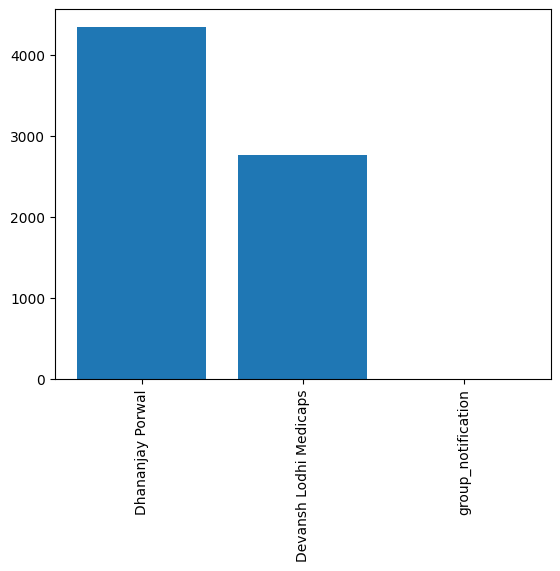

In [124]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')

In [125]:
percentage = round((df['user'].value_counts()/df.shape[0])*100, 2).reset_index().rename(columns = {'index': 'name', 'user':'percent'})
percentage = percentage[0:2]
percentage

,percent,count
0,Dhananjay Porwal,61.12
1,Devansh Lodhi Medicaps,38.83


### Words Count & Plot

In [126]:
words = []

for message in df['message']:
    words.extend(message.split())
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Ganga',
 'Nagar',
 'https://maps.app.goo.gl/jwTaq5DA47PztFMe9',
 'en19cs301106@medicaps.ac.in',
 'T6wPkx52XyRTsLu',
 'Bhai',
 'avi',
 'ke',
 'gift',
 'me',
 'kitna',
 'contri',
 'krna',
 'he',
 'batao',
 '75',
 'Hav',
 'All',
 'the',
 'best',
 'bhai',
 'exam',
 'ke',
 'liye',
 '✨',
 '🥲',
 'Paper',
 'kesa',
 'gya',
 'bhai?',
 'Me',
 'pucha',
 'hi',
 'bhul',
 'gya🥲',
 'diya',
 'hi',
 'nhi',
 'Tumne',
 'bhi😂',
 'yess',
 'but',
 'kya',
 'pata',
 'mera',
 'selection',
 'ho',
 'jaye',
 '🤣',
 'industrial',
 'training',
 'ka',
 'kya',
 'krra',
 'tu',
 'Mt',
 'hi',
 'pucho',
 'bhai',
 'Na',
 'idhr',
 'ka',
 'na',
 'udhr',
 'ka',
 'Itni',
 'buri',
 'halat',
 'he🥲',
 'Bhai',
 'kuch',
 'kiya',
 'kya',
 'tune?',
 'ye',
 'sb',
 'to',
 'kuch',
 'nhi',
 'sb',
 'de

In [127]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,to,893
1,nhi,688
2,me,637
3,hi,626
4,<Media,601
5,omitted>,601
6,he,508
7,h,503
8,bhi,413
9,😂,384


In [128]:
# Remove Group Notification Messages
temp = df[df['user'] == 'group_notification']
# Remove Media Omitted Messages
temp = temp[temp['message'] != '<Media omitted>\n']
temp = temp[temp['message'] != 'Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n']
# Remove Stop Words
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()

words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,security,2
1,code,2
2,devansh,2
3,lodhi,2
4,medicaps,2
5,changed.,2
6,tap,2
7,learn,2
8,more.,2


### Emoji Uses Analysis

In [129]:
import emoji

In [130]:
emojis = []
for message in df['message']:
    emojis.extend(s for s in message if emoji.is_emoji(s))
emojis

['✨',
 '🥲',
 '🥲',
 '😂',
 '🤣',
 '🥲',
 '🤥',
 '❓',
 '🥲',
 '🥲',
 '🤣',
 '😂',
 '🥲',
 '🤥',
 '🥲',
 '\U0001faf6',
 '🥲',
 '😂',
 '😂',
 '😂',
 '🥲',
 '\U0001fae0',
 '🥺',
 '🤔',
 '🤔',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤣',
 '😂',
 '😢',
 '😂',
 '😂',
 '😂',
 '🤩',
 '🥲',
 '😢',
 '😂',
 '\U0001f979',
 '😂',
 '😂',
 '😂',
 '🥲',
 '😂',
 '\U0001f979',
 '😂',
 '😂',
 '\U0001faf6',
 '😅',
 '😂',
 '😂',
 '😂',
 '😢',
 '😢',
 '🥲',
 '😶',
 '🌫',
 '😂',
 '🤔',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😶',
 '🌫',
 '😂',
 '🥲',
 '🤣',
 '😂',
 '😂',
 '🤣',
 '😂',
 '🥲',
 '😂',
 '😂',
 '😂',
 '🐭',
 '😂',
 '😂',
 '😢',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😢',
 '🤣',
 '😂',
 '🥲',
 '😂',
 '🤣',
 '🥲',
 '🥲',
 '🥲',
 '🥲',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😑',
 '😂',
 '😅',
 '😑',
 '😂',
 '😂',
 '🥴',
 '😆',
 '🥲',
 '😂',
 '🥲',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😅',
 '😅',
 '😂',
 '😢',
 '🫂',
 '😂',
 '🥲',
 '😂',
 '🥲',
 '😅',
 '🥺',
 '😂',
 '😂',
 '🥲',
 '😢',
 '😅',
 '\U0001f979',
 '🥲',
 '😂',
 '😂',
 '🥲',
 '😂',
 '😂',
 '🥴',
 '🥲',
 '🥴',
 '😑',
 '😂',
 '😐',
 '😂'

In [131]:
from collections import Counter

emoji_counter = Counter(emojis)
most_common_emojis = emoji_counter.most_common(len(emoji_counter))

# Convert to DataFrame for better visualization
df_emojis = pd.DataFrame(most_common_emojis, columns=['Emoji', 'Count'])
df_emojis

,Emoji,Count
0,😂,572
1,🤣,170
2,🥲,165
3,😅,107
4,🥹,95
...,...,...
94,🏼,1
95,💙,1
96,🩵,1
97,😊,1


### Timeline Analysis

In [132]:
df['month_num'] = df['date'].dt.month
df

,date,user,message,year,month,day,hour,minute,month_num
0,2021-10-29 22:46:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,October,29,22,46,10
1,2021-11-06 15:41:00,Devansh Lodhi Medicaps,Ganga Nagar\nhttps://maps.app.goo.gl/jwTaq5DA4...,2021,November,6,15,41,11
2,2021-11-10 15:10:00,Devansh Lodhi Medicaps,en19cs301106@medicaps.ac.in\nT6wPkx52XyRTsLu\n,2021,November,10,15,10,11
3,2022-06-27 14:17:00,Dhananjay Porwal,Bhai avi ke gift me kitna contri krna he batao\n,2022,June,27,14,17,6
4,2022-06-27 14:19:00,Devansh Lodhi Medicaps,75\n,2022,June,27,14,19,6
...,...,...,...,...,...,...,...,...,...
7110,2024-03-29 17:45:00,Devansh Lodhi Medicaps,purre kl raat tk\n,2024,March,29,17,45,3
7111,2024-03-29 17:46:00,Dhananjay Porwal,<Media omitted>\n,2024,March,29,17,46,3
7112,2024-03-29 17:46:00,Devansh Lodhi Medicaps,abhi nhi bhi ho paye to koi nhi fir aaunga\n,2024,March,29,17,46,3
7113,2024-03-29 17:46:00,Dhananjay Porwal,"Sir batt milne ki he tumse, holi to hoti reheg...",2024,March,29,17,46,3


In [137]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2021,10,October,1
1,2021,11,November,2
2,2022,6,June,5
3,2022,7,July,902
4,2022,8,August,292
5,2022,9,September,401
6,2022,10,October,538
7,2022,11,November,582
8,2022,12,December,295
9,2023,1,January,563


In [143]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + " - " + str(timeline['year'][i]))
time

['October - 2021',
 'November - 2021',
 'June - 2022',
 'July - 2022',
 'August - 2022',
 'September - 2022',
 'October - 2022',
 'November - 2022',
 'December - 2022',
 'January - 2023',
 'February - 2023',
 'March - 2023',
 'April - 2023',
 'May - 2023',
 'June - 2023',
 'July - 2023',
 'August - 2023',
 'September - 2023',
 'October - 2023',
 'November - 2023',
 'December - 2023',
 'January - 2024',
 'February - 2024',
 'March - 2024']

In [145]:
timeline['time'] = time

In [146]:
timeline

,year,month_num,month,message,time
0,2021,10,October,1,October - 2021
1,2021,11,November,2,November - 2021
2,2022,6,June,5,June - 2022
3,2022,7,July,902,July - 2022
4,2022,8,August,292,August - 2022
5,2022,9,September,401,September - 2022
6,2022,10,October,538,October - 2022
7,2022,11,November,582,November - 2022
8,2022,12,December,295,December - 2022
9,2023,1,January,563,January - 2023


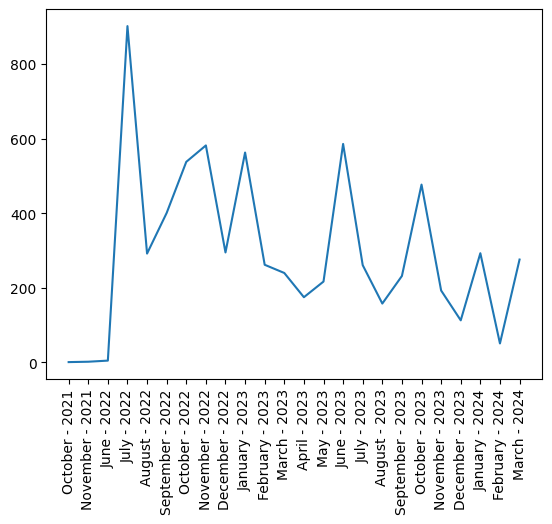

In [151]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [155]:
df['only_date']= df['date'].dt.date

In [160]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

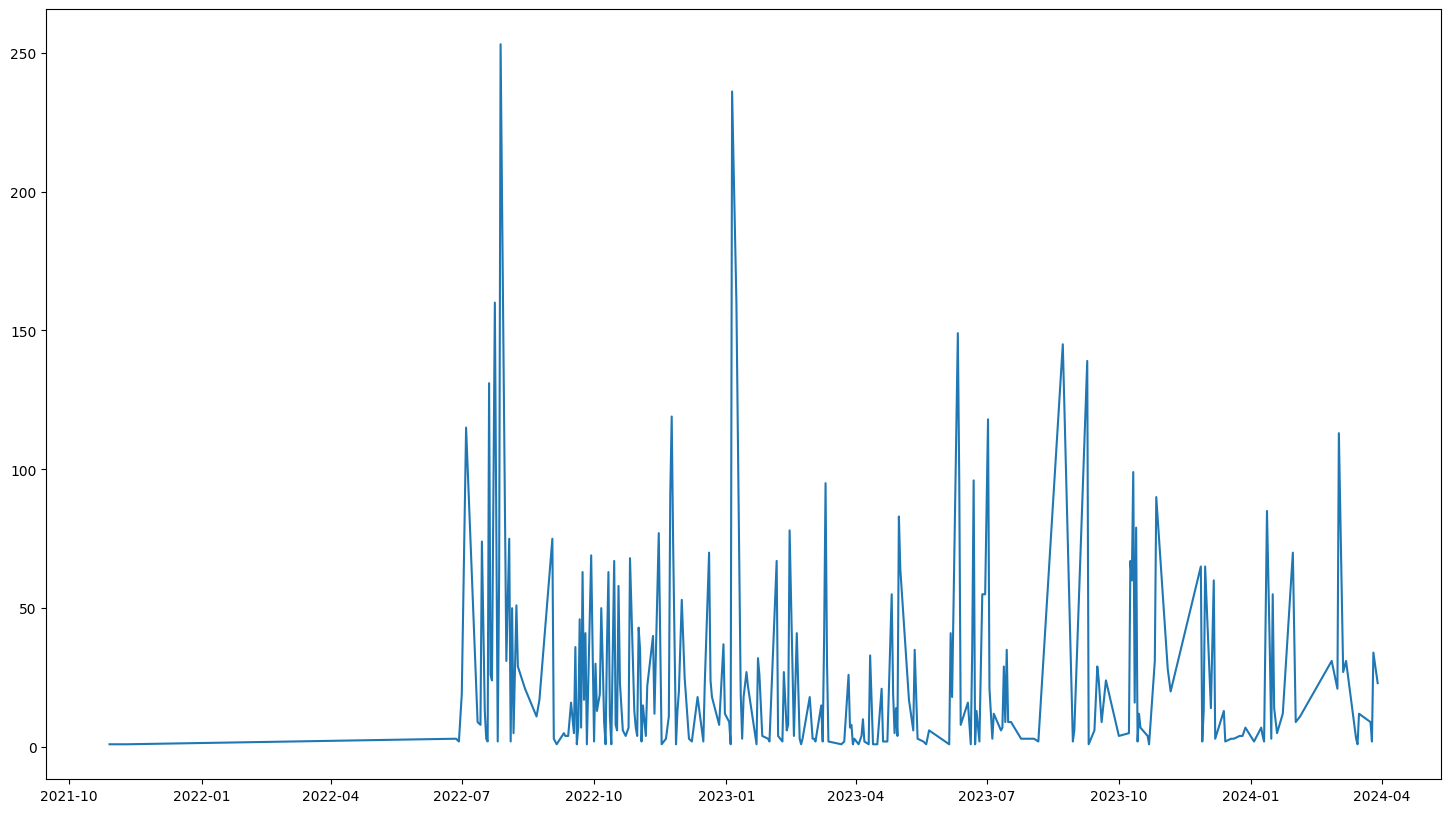

In [163]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [164]:
df['day_name'] = df['date'].dt.day_name()
df['day_name'].value_counts()

day_name
Thursday     1240
Wednesday    1202
Sunday       1075
Friday       1041
Tuesday       998
Monday        873
Saturday      686
Name: count, dtype: int64

In [165]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2021-10-29 22:46:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,October,29,22,46,10,2021-10-29,Friday
1,2021-11-06 15:41:00,Devansh Lodhi Medicaps,Ganga Nagar\nhttps://maps.app.goo.gl/jwTaq5DA4...,2021,November,6,15,41,11,2021-11-06,Saturday
2,2021-11-10 15:10:00,Devansh Lodhi Medicaps,en19cs301106@medicaps.ac.in\nT6wPkx52XyRTsLu\n,2021,November,10,15,10,11,2021-11-10,Wednesday
3,2022-06-27 14:17:00,Dhananjay Porwal,Bhai avi ke gift me kitna contri krna he batao\n,2022,June,27,14,17,6,2022-06-27,Monday
4,2022-06-27 14:19:00,Devansh Lodhi Medicaps,75\n,2022,June,27,14,19,6,2022-06-27,Monday


In [166]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23: period.append(str(hour) + '-' + str('00'))
    elif hour == 0: period.append(str('00') + '-' + str(hour+1))
    else: period.append(str(hour) + '-' + str(hour+1))

In [170]:
df['period'] = period
df

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2021-10-29 22:46:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,October,29,22,46,10,2021-10-29,Friday,22-23
1,2021-11-06 15:41:00,Devansh Lodhi Medicaps,Ganga Nagar\nhttps://maps.app.goo.gl/jwTaq5DA4...,2021,November,6,15,41,11,2021-11-06,Saturday,15-16
2,2021-11-10 15:10:00,Devansh Lodhi Medicaps,en19cs301106@medicaps.ac.in\nT6wPkx52XyRTsLu\n,2021,November,10,15,10,11,2021-11-10,Wednesday,15-16
3,2022-06-27 14:17:00,Dhananjay Porwal,Bhai avi ke gift me kitna contri krna he batao\n,2022,June,27,14,17,6,2022-06-27,Monday,14-15
4,2022-06-27 14:19:00,Devansh Lodhi Medicaps,75\n,2022,June,27,14,19,6,2022-06-27,Monday,14-15
...,...,...,...,...,...,...,...,...,...,...,...,...
7110,2024-03-29 17:45:00,Devansh Lodhi Medicaps,purre kl raat tk\n,2024,March,29,17,45,3,2024-03-29,Friday,17-18
7111,2024-03-29 17:46:00,Dhananjay Porwal,<Media omitted>\n,2024,March,29,17,46,3,2024-03-29,Friday,17-18
7112,2024-03-29 17:46:00,Devansh Lodhi Medicaps,abhi nhi bhi ho paye to koi nhi fir aaunga\n,2024,March,29,17,46,3,2024-03-29,Friday,17-18
7113,2024-03-29 17:46:00,Dhananjay Porwal,"Sir batt milne ki he tumse, holi to hoti reheg...",2024,March,29,17,46,3,2024-03-29,Friday,17-18


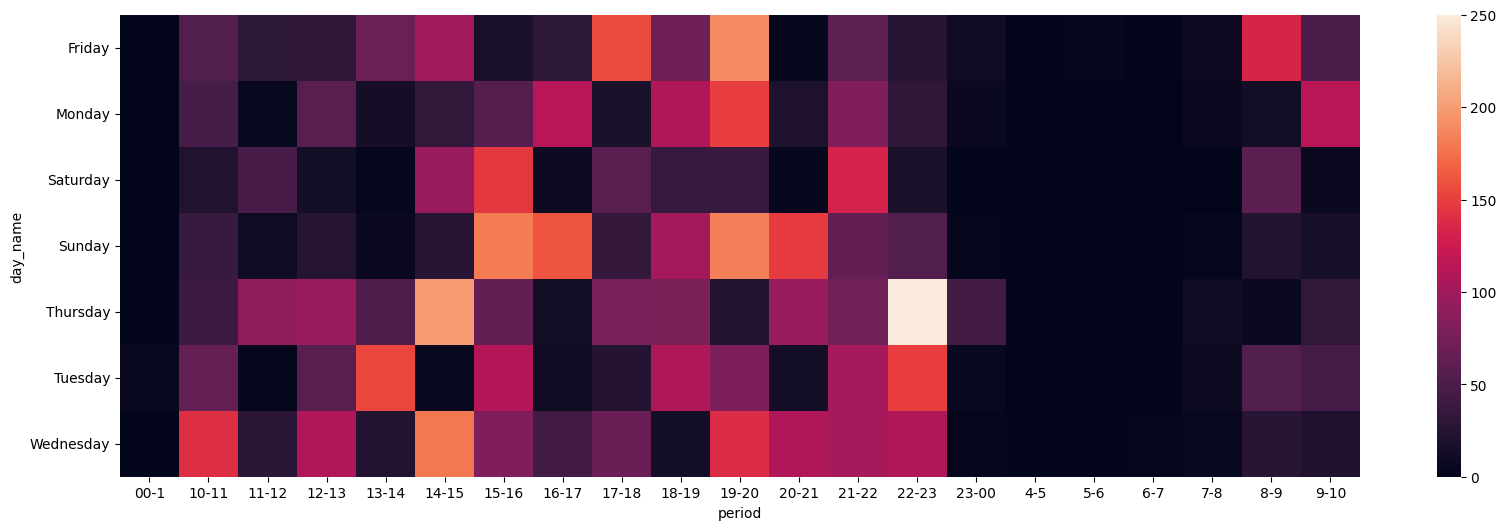

In [171]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc = 'count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()